In [57]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import urllib.request
import ssl
import certifi

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# K-Means on a synthetic data set

In [42]:
# We need to set a random seed
np.random.seed(0)

In [43]:
# We will be making random clusters of points
# X = The generated samples.
# y = The integer labels for cluster membership of each sample. 
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

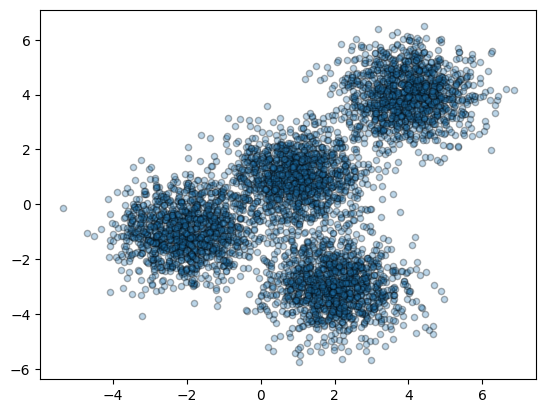

In [44]:
plt.scatter(X[:, 0], X[:, 1], marker='.',alpha=0.3,ec='k',s=80)

# Modeling

In [ ]:
# k-means++: Selects initial cluster centres for k-means clustering in a smart way to speed up convergence
k_means_5 = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [ ]:
k_means_5.fit(X)

,n_clusters,4
,init,'k-means++'
,n_init,12
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [ ]:
# Get the label for each point in the model
k_means_labels = k_means_5.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], shape=(5000,), dtype=int32)

In [ ]:
# Get the coordinates of the cluster centers
k_means_cluster_centers = k_means_5.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

# Visual Plot

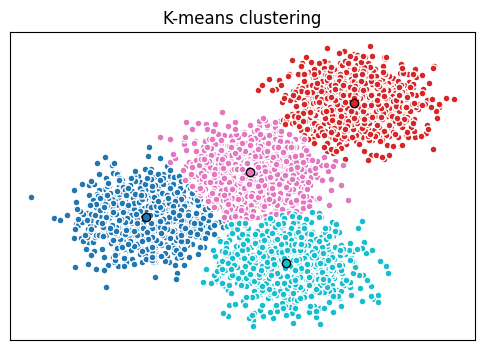

In [ ]:
# Initialize the plot with the specified dimensions.
fig_3d = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig_3d.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(4), colors):
    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('K-means clustering')

# Remove x-axis and y-axis ticks
ax.set_xticks(())
ax.set_yticks(())

plt.show()

# Exercises

1. Try to cluster the above dataset into a different number of clusters, say k=3. Note the difference in the pattern generated.

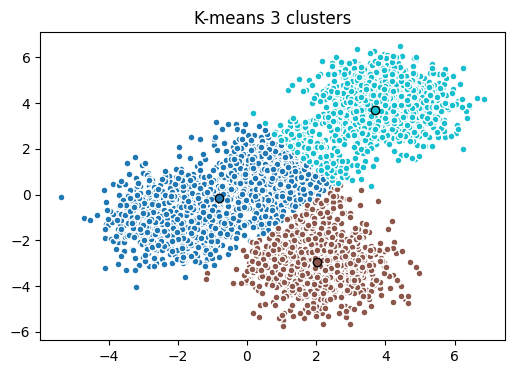

In [ ]:
k_means_5 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means_5.fit(X)
fig_3d = plt.figure(figsize=(6, 4))
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_5.labels_))))

ax = fig_3d.add_subplot(1, 1, 1)

for k, col in zip(range(3), colors):
    my_members = (k_means_5.labels_ == k)
    cluster_center = k_means_5.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

ax.set_title('K-means 3 clusters')
plt.show()


2. Try the same with k=5.

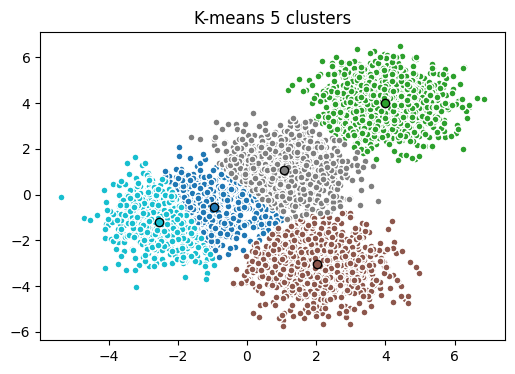

In [ ]:
k_means_5 = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)
k_means_5.fit(X)
fig_3d = plt.figure(figsize=(6, 4))
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_5.labels_))))

ax = fig_3d.add_subplot(1, 1, 1)

for k, col in zip(range(5), colors):
    my_members = (k_means_5.labels_ == k)
    cluster_center = k_means_5.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

ax.set_title('K-means 5 clusters')
plt.show()


3. Comment on the within-cluster sum of squares, i.e. inertia, of the clusters created for k=3 and k=5.

For k=3, the value of within-cluster sum of squares will be higher that that for k=4, since the points from different natural clusters are being grouped together, leading to underfitting of the k-means model. For k=5, the value of will be lesser than that for k=4, since the points are distributed into mode clusters than needed, leading to over-fitting of the k-means model.

# Customer Segmentation with k-means

Imagine that you have a customer dataset, and you need to apply customer segmentation to this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, or more likely to purchase products, or subscribe to a service. A business task is to retain those customers.


In [67]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv"
ssl_context = ssl.create_default_context(cafile=certifi.where())
with urllib.request.urlopen(path, context=ssl_context) as response:
    data = pd.read_csv(response)
data

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


# Data Preprocessing

As you can see, Address in this dataset is a categorical variable. The k-means algorithm doesn't work directly with categorical variables because the Euclidean distance function isn't meaningful for them. You could one-hot encode the categorical feature, but for illustration purposes let's run k-means clustering without it.

In [69]:
customer_data = data.drop('Address', axis=1)
customer_data = customer_data.dropna()
customer_data.info()
customer_data

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      700 non-null    int64  
 1   Age              700 non-null    int64  
 2   Edu              700 non-null    int64  
 3   Years Employed   700 non-null    int64  
 4   Income           700 non-null    int64  
 5   Card Debt        700 non-null    float64
 6   Other Debt       700 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
844,845,41,1,7,43,0.694,1.198,0.0,4.4
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9


Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally, tranforming the features so they have zero mean and standard deviation of one. We use `StandardScaler()` to normalize, or standardize our dataset.


In [71]:
X = customer_data.values[:,1:] # leaves out `Customer ID`
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.76830405,  0.29879269, -0.35900652, ..., -0.60428433,
        -0.59494973, -0.58052847],
       [ 1.51908977, -0.77932527,  2.64702891, ...,  1.5706204 ,
        -0.59494973,  0.37222169],
       [-0.23274357,  0.29879269,  0.24220057, ...,  0.83520125,
         1.68081427,  1.55949495],
       ...,
       [-1.2337912 ,  2.45502862, -1.26081715, ...,  0.04620852,
         1.68081427,  3.39170678],
       [-0.35787453, -0.77932527,  0.54280411, ..., -0.71904138,
        -0.59494973, -1.07889008],
       [ 2.14474454, -0.77932527,  1.1440112 , ...,  0.17648972,
        -0.59494973, -0.24340149]], shape=(700, 8))

# Modeling

In [72]:
model = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
model.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,12
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


We assign the k-means cluster labels to each row in the dataframe. We can easily check the centroid values by averaging the features in each cluster. These values indicate the central point of the cluster from the vantage point of the field in question.

In [77]:
customer_data["Clus_km"] = model.labels_
customer_data.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,439.80226,32.775895,1.632768,6.169492,30.642185,1.003795,2.090910,0.284369,10.146893
1,374.00000,44.785714,3.000000,17.857143,219.714286,6.115429,11.546357,0.285714,8.064286
2,403.56129,41.103226,1.916129,15.135484,81.122581,3.024935,5.605258,0.180645,10.848387


Now, let's look at the distribution of customers based on their education, age and income. We can choose to visualise this as a 2D scatter plot with Age on the x-axis, Income on the y-axis and the marker size representing education. The scatter points will be assigned different colors based on different class labels.

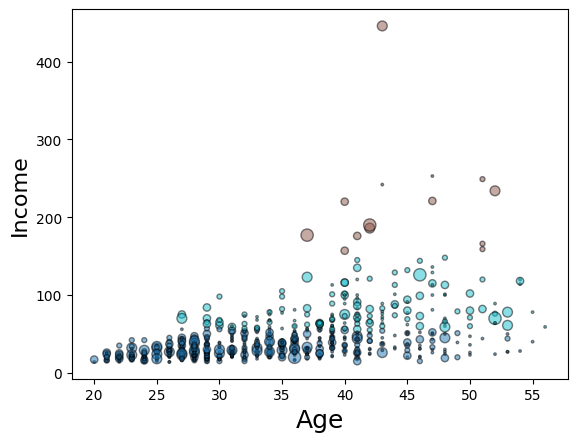

In [78]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=model.labels_.astype(float), cmap='tab10', ec='k',alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

In [98]:
import nbformat
print(nbformat.__version__)
# Create interactive 3D scatter plot
fig_3d = px.scatter_3d(X, x=1, y=0, z=3, opacity=0.7, color=model.labels_.astype(float))

fig_3d.update_traces(marker=dict(size=5, line=dict(width=.25)), showlegend=False)
fig_3d.update_layout(coloraxis_showscale=False, width=1000, height=800, scene=dict(
        xaxis=dict(title='Education'),
        yaxis=dict(title='Age'),
        zaxis=dict(title='Income')
    ))

5.10.4


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': '1=%{x}<br>0=%{y}<br>3=%{z}<br>color=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': {'bdata': ('AAAAAAAAAAAAAAAAAAAAQAAAAAAAAA' ... 'AAAAAAAAAAAAAAAAAAAAAAAAAAAEA='),
                                   'dtype': 'f8'},
                         'coloraxis': 'coloraxis',
                         'line': {'width': 0.25},
                         'opacity': 0.7,
                         'size': 5,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'x': {'bdata': ('AAAAAAAAAEAAAAAAAADwPwAAAAAAAA' ... 'AAAAAQQAAAAAAAAPA/AAAAAAAA8D8='),
                    'dtype': 'f8'},
              'y': {'bdata': ('AAAAAACAREAAAAAAAIBHQAAAAAAAgE' ... 'AAAAA5QAAAAAAAAEBAAAAAAAAASkA='),
                    'dtype': 'f8'},
              'z': {'bdata': ('AAAAAAAAM0AAAAAAAABZQAAAAAAAgE' ... 'AAAAAyQAAAAAAAADxAAAAAAAAAUEA='),
                    'dtype': 'f8'}}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'color'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']],
                             'showscale': False},
               'height': 800,
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'xaxis': {'title': {'text': 'Education'}},
                         'yaxis': {'title': {'text': 'Age'}},
                         'zaxis': {'title': {'text': 'Income'}}},
               'template': '...',
               'width': 1000}
})

k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.

Create a profile for each group, considering the common characteristics of each cluster based on your observations above:
The 3 clusters can be:
- LATE CAREER, AFFLUENT, AND EDUCATED
- MID CAREER AND MIDDLE INCOME
- EARLY CAREER AND LOW INCOME